In [4]:
#import

import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Connexion to datawharehouse


connexion = psycopg2.connect(
    host="localhost",
    database="nyc_warehouse",
    user="postgres",
    password="postgres"
)

/tmp/ipykernel_75748/3697229526.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_prices = pd.read_sql(query_prices, connexion)


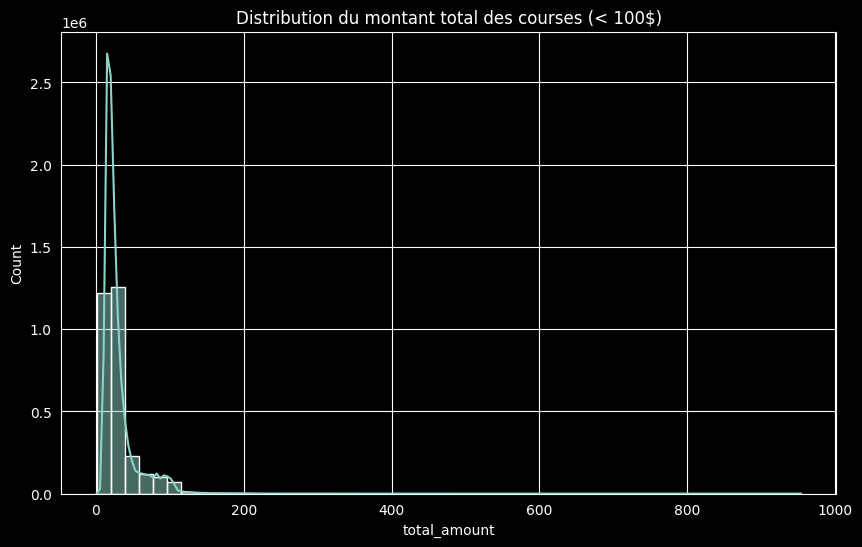

In [24]:
# Requête pour les statistiques de base
query_prices = "SELECT total_amount, trip_distance, passenger_count FROM fact_trips"
df_prices = pd.read_sql(query_prices, connexion)

# Visualisation de la distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(df_prices[df_prices['total_amount']<1000]['total_amount'], bins=50, kde=True)
plt.title('Distribution du montant total des courses (< 100$)')
plt.show()

/tmp/ipykernel_75748/1543953372.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_time = pd.read_sql(query_time, connexion)


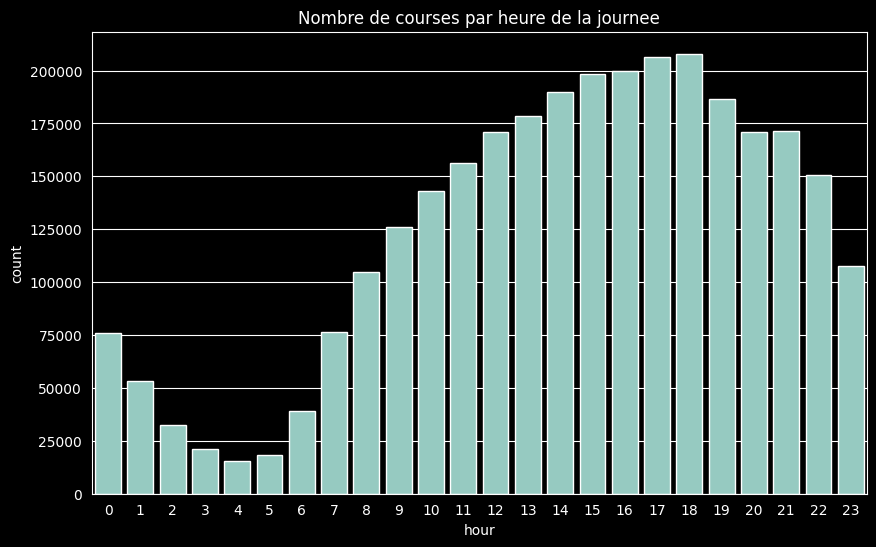

In [25]:
query_time = """
    SELECT t.hour, COUNT(*) as count
    FROM fact_trips f
    JOIN dim_time t ON f.tpep_pickup_datetime = t.full_datetime
    GROUP BY t.hour
    ORDER BY t.hour
"""
df_time = pd.read_sql(query_time, connexion)

plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', data=df_time)
plt.title('Nombre de courses par heure de la journee')
plt.show()

/tmp/ipykernel_75748/1987668232.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_zones = pd.read_sql(query_zones, connexion)


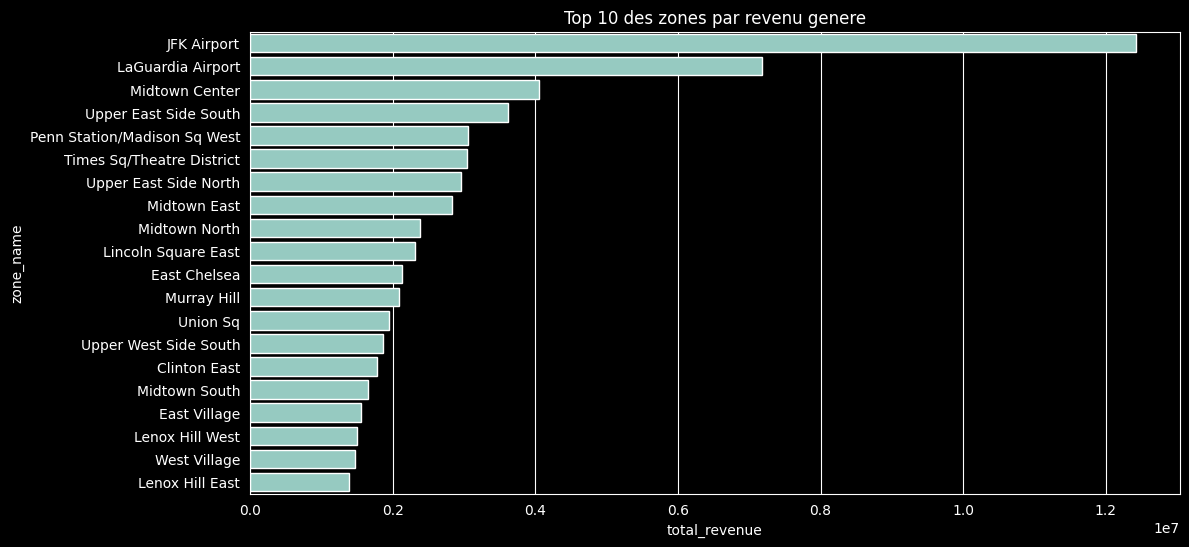

In [10]:
query_zones = """
    SELECT l.zone_name, SUM(f.total_amount) as total_revenue
    FROM fact_trips f
    JOIN dim_location l ON f.pulocationid = l.location_id
    GROUP BY l.zone_name
    ORDER BY total_revenue DESC
    limit 20
"""
df_zones = pd.read_sql(query_zones, connexion)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='zone_name', data=df_zones)
plt.title('Top 10 des zones par revenu genere')
plt.show()

/tmp/ipykernel_75748/3969085850.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_quartier = pd.read_sql(query_quartier, connexion)


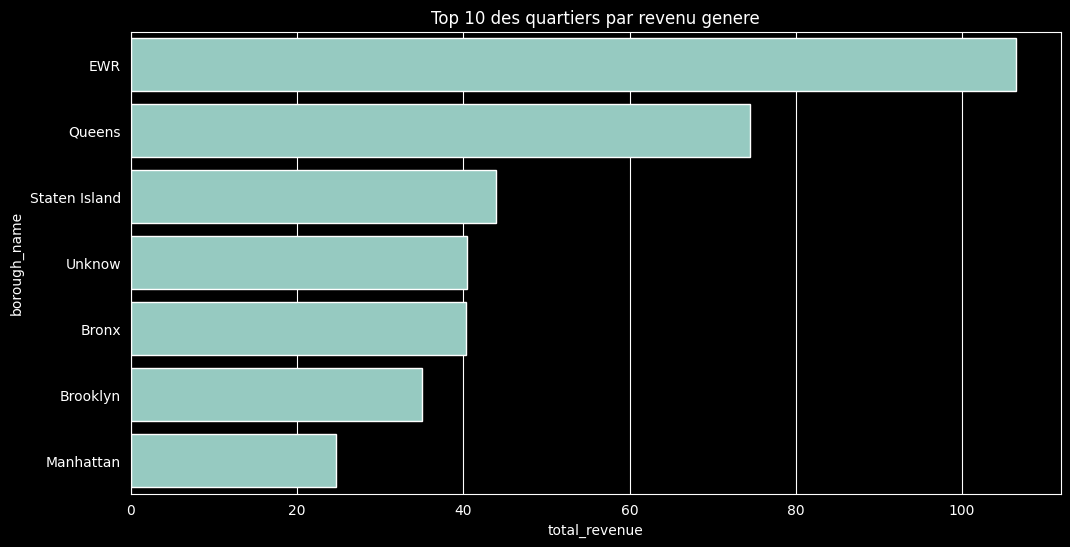

In [26]:
query_quartier = """
    SELECT b.borough_name, AVG(f.total_amount) as total_revenue
    FROM fact_trips f
    JOIN dim_location l ON f.pulocationid = l.location_id
    JOIN dim_borough b on l.borough_id = b.borough_id
    GROUP BY b.borough_name
    ORDER BY total_revenue DESC
"""
df_quartier = pd.read_sql(query_quartier, connexion)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_revenue', y='borough_name', data=df_quartier)
plt.title('Top 10 des quartiers par revenu genere')
plt.show()

In [33]:
connexion.rollback()

/tmp/ipykernel_75748/4016374441.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tips = pd.read_sql(querry_tips, connexion)


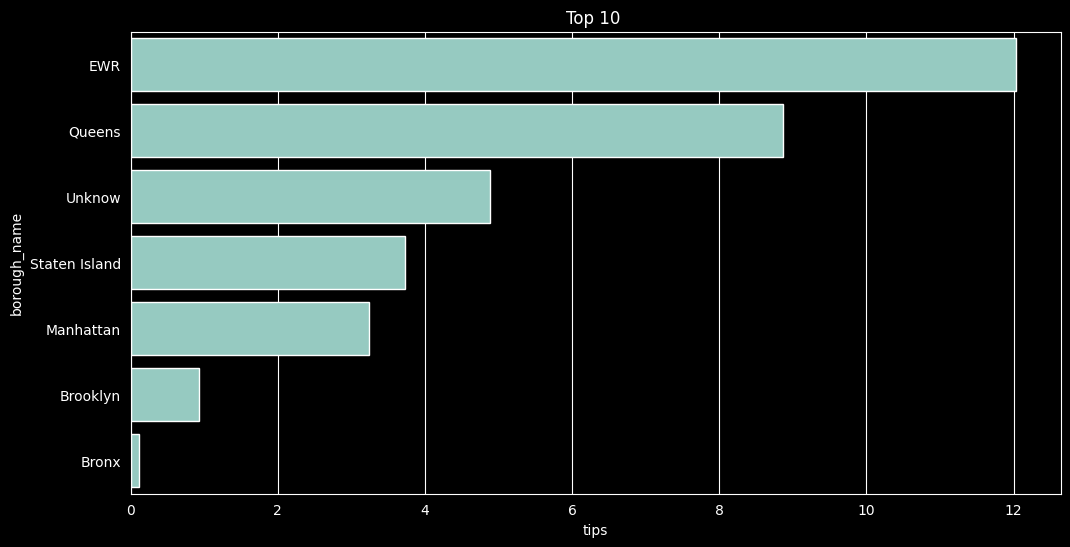

In [27]:
querry_tips = query_quartier = """
    SELECT b.borough_name, AVG(f.tip_amount) as tips
    FROM fact_trips f
    JOIN dim_location l ON f.pulocationid = l.location_id
    JOIN dim_borough b on l.borough_id = b.borough_id
    GROUP BY b.borough_name
    ORDER BY tips DESC
"""

tips = pd.read_sql(querry_tips, connexion)

plt.figure(figsize=(12, 6))
sns.barplot(x='tips', y='borough_name', data=tips)
plt.title('Top 10 ')
plt.show()

/tmp/ipykernel_75748/896670247.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connexion)


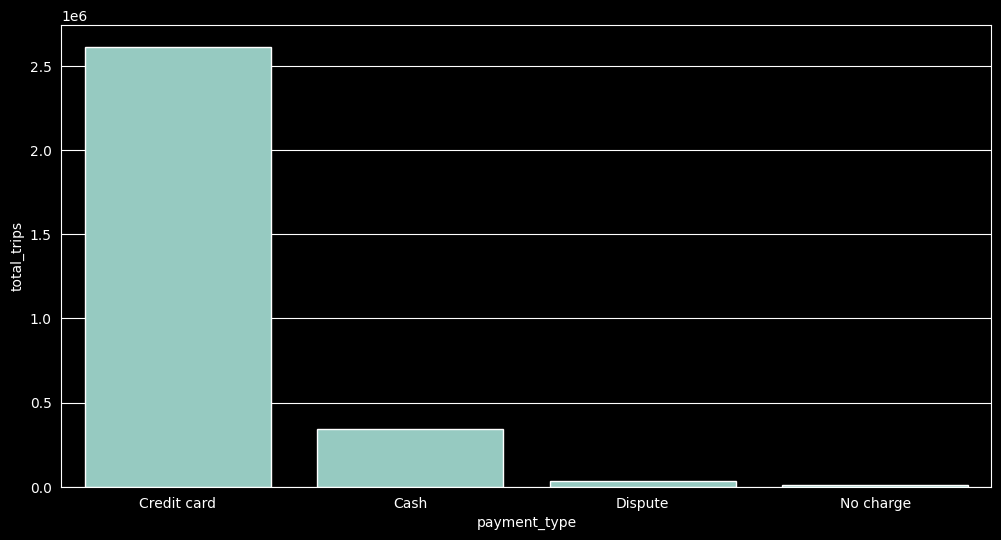

In [34]:
query = """SELECT
    p.payment_type,
    count(f.id) as total_trips
FROM Fact_Trips f
JOIN Dim_Payment p ON f.payment_type = p.payment_id
GROUP BY p.payment_type
ORDER BY total_trips DESC
"""
df = pd.read_sql(query, connexion)

plt.figure(figsize=(12, 6))
sns.barplot(x='payment_type',y="total_trips", data=df)
plt.title('')
plt.show()

/tmp/ipykernel_75748/760367904.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connexion)


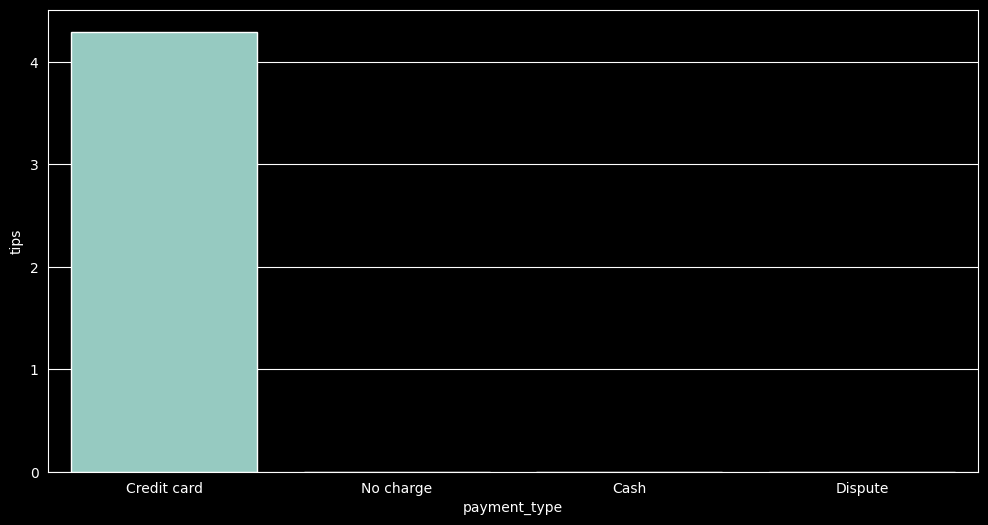

In [36]:
query = """SELECT
    p.payment_type,
    AVG(f.tip_amount) as tips
FROM Fact_Trips f
JOIN Dim_Payment p ON f.payment_type = p.payment_id
GROUP BY p.payment_type
ORDER BY tips DESC
"""
df = pd.read_sql(query, connexion)

plt.figure(figsize=(12, 6))
sns.barplot(x='payment_type',y="tips", data=df)
plt.title('')
plt.show()

/tmp/ipykernel_75748/3813744943.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connexion)


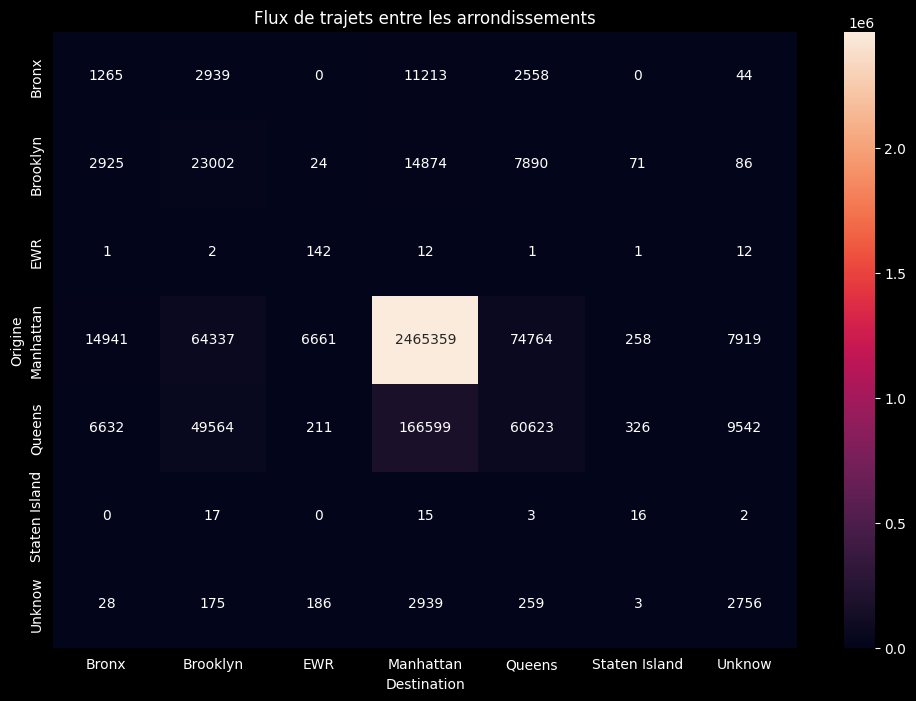

In [38]:
query = """
SELECT
    b_pu.borough_name AS origin,
    b_do.borough_name AS destination,
    COUNT(*) AS trip_count
FROM Fact_Trips f
JOIN Dim_Location l_pu ON f.PULocationID = l_pu.location_id
JOIN Dim_Borough b_pu ON l_pu.borough_id = b_pu.borough_id
JOIN Dim_Location l_do ON f.DOLocationID = l_do.location_id
JOIN Dim_Borough b_do ON l_do.borough_id = b_do.borough_id
GROUP BY origin, destination
"""
df = pd.read_sql(query, connexion)

heatmap_data = df.pivot(index='origin', columns='destination', values='trip_count')

# Remplacer les valeurs manquantes (NaN) par 0
heatmap_data = heatmap_data.fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f",)

plt.title('Flux de trajets entre les arrondissements')
plt.xlabel('Destination')
plt.ylabel('Origine')
plt.show()